In [1]:
# Cell 1: Import libraries
import requests
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [9]:
# Cell 2: Configuration variables
API_KEY = '9dd0d25dab5dceaccf3011e0bc530540'  # Remember to set this in your environment
CITY_ID = '110336'
UNITS = 'metric'
URL = f"http://api.openweathermap.org/data/2.5/weather?id={CITY_ID}&appid={API_KEY}&units={UNITS}"


In [10]:
# Cell 3: Function to fetch weather data
def fetch_weather_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print("Failed to fetch data. Make sure your API key is correct.")
        return None


In [11]:
# Cell 4: Function to process weather data
def process_weather_data(weather_data):
    if weather_data:
        weather_df = pd.DataFrame({
            'City': [weather_data.get('name')],
            'Temperature': [weather_data['main']['temp']],
            'Humidity': [weather_data['main']['humidity']],
            'Pressure': [weather_data['main']['pressure']],
            'Description': [weather_data['weather'][0]['description']],
            'Date': [datetime.fromtimestamp(weather_data['dt']).strftime("%Y-%m-%d %H:%M:%S")]
        })
        return weather_df
    else:
        return pd.DataFrame()


In [12]:
# Cell 5: Function to display weather data
def display_weather_data(weather_df):
    if not weather_df.empty:
        weather_summary = weather_df.iloc[0]
        print(f"Weather Summary for {weather_summary['City']} at {weather_summary['Date']}:")
        print(f"Temperature: {weather_summary['Temperature']}°C")
        print(f"Humidity: {weather_summary['Humidity']}%")
        print(f"Pressure: {weather_summary['Pressure']} hPa")
        print(f"Conditions: {weather_summary['Description']}")
    else:
        print("No weather data available.")


In [13]:
# Cell 6: Function to visualize weather data
def visualize_weather_data(weather_df):
    if not weather_df.empty:
        sns.set_style("whitegrid")
        plt.figure(figsize=(12, 6))
        sns.lineplot(x='Date', y='Temperature', data=weather_df, marker='o', label='Temperature')
        plt.title('Temperature over Time')
        plt.xticks(rotation=45)
        plt.ylabel('Temperature (°C)')
        plt.tight_layout()
        plt.show()
    else:
        print("No data available for visualization.")


Weather Summary for Dammam at 2024-03-20 07:37:13:
Temperature: 24.06°C
Humidity: 78%
Pressure: 1015 hPa
Conditions: scattered clouds


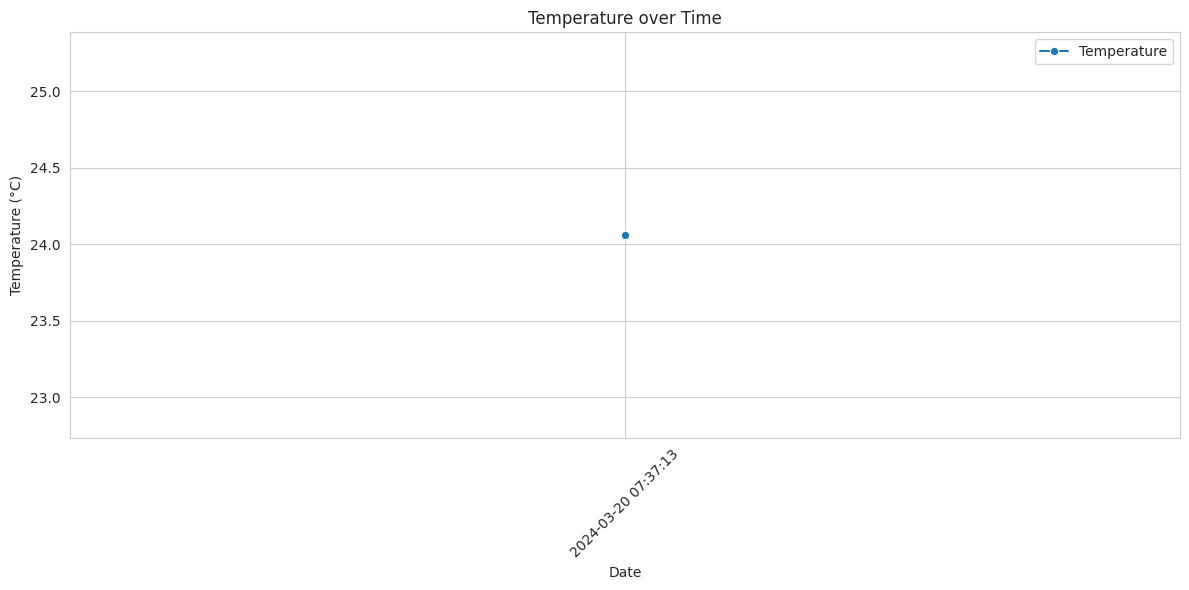

In [14]:
# Cell 7: Main function and execution
def main():
    weather_data = fetch_weather_data(URL)
    weather_df = process_weather_data(weather_data)
    display_weather_data(weather_df)
    visualize_weather_data(weather_df)

if __name__ == "__main__":
    main()
